# Proyecto Final - Mod3

## Configuraciones y carga de datos


Como paso preliminar, se importan las librerías a utilizar y se realiza la conexión con Drive.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore') #Se utilizó esta propiedad para evitar mensajes de error

pd.set_option('display.float_format', '{:,.6f}'.format) #Se definió un formato a 6 decimales para todos los cálculos

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Para comenzar, es necesario configurar los datos en un data frame (df) de pandas

In [2]:
carpeta = 'drive/MyDrive/Proyecto_Solvencia/'
csvv = 'Datos_proyecto.csv'
df = pd.read_csv(carpeta + csvv)
print(df.shape)
df.head()

print(df.columns)

(105, 14)
Index(['Company_ID', 'Total_Revenue', 'Short_Term_Debt', 'Long_Term_Debt',
       'Current_Assets', 'Current_Liabilities', 'Equity', 'Financial_Expenses',
       'Current_Ratio', 'Debt_to_Equity_Ratio', 'Interest_Coverage_Ratio',
       'Industry', 'Country', 'Company_Size'],
      dtype='object')


## Identificación y tratamiento para los datos duplicados

La limpieza de esta base datos se inicia con la identificación de datos duplicados.

In [3]:
print(df.shape) #Muestra el tamaño original de la bd
print(df.drop_duplicates().shape) #Indica el tamaño de la bd sin duplicados

(105, 14)
(101, 14)


In [4]:
#Una vez identificada la existencia de duplicados, se eliminan
df.drop_duplicates(inplace=True)

## Análisis de variables categóricas

Se optó tomar por dividir el análisis por separado para variables categóricas y numéricas.

In [5]:
#Primero, se colocarán toddas las variables categóricas en una lista
cols_not_num = df.select_dtypes(include='object').columns
cols_not_num

Index(['Company_ID', 'Industry', 'Country', 'Company_Size'], dtype='object')

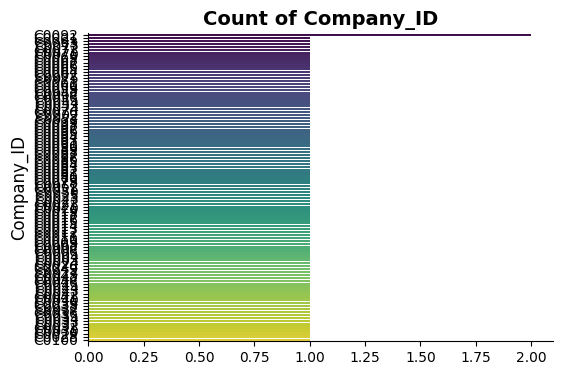

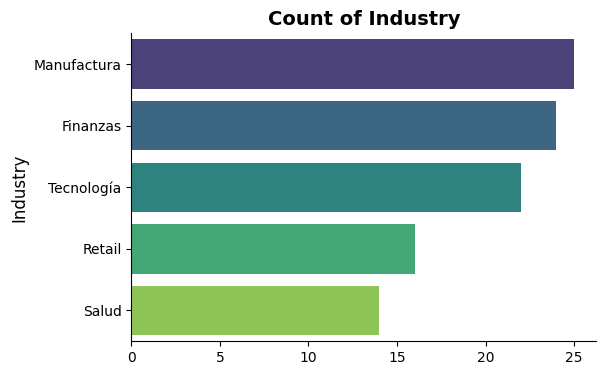

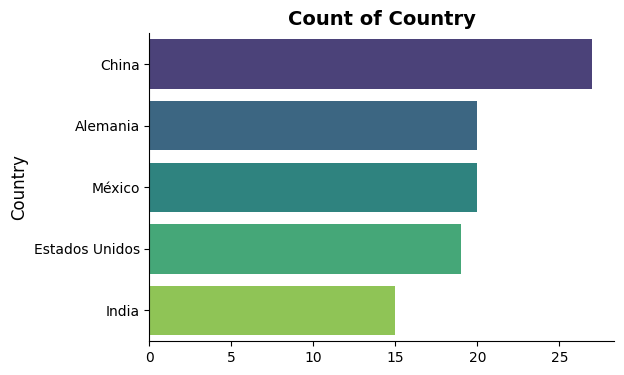

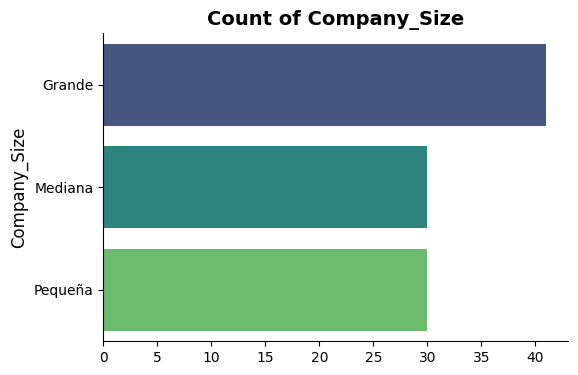

In [6]:
# Sobre la lista se hacen gráficas de frecuencia para conocer los valores únicos de cada columna
for col in cols_not_num:
  cont = df[col].value_counts()

  plt.figure(figsize=(6, 4))
  sns.barplot(x=cont.values, y=cont.index, palette="viridis")
  plt.title(f'Count of {col}', fontsize=14, fontweight='bold')
  plt.xlabel('', fontsize=12)
  plt.ylabel(col, fontsize=12)

  plt.gca().spines['top'].set_visible(False)  # Ocultar la línea superior
  plt.gca().spines['bottom'].set_visible(True)  # Mostrar la línea inferior
  plt.gca().spines['right'].set_visible(False)  # Ocultar la línea derecha
  plt.gca().spines['left'].set_visible(True)  # Mostrar la línea izquierda

  plt.show()
  print()

In [7]:
#Se revisa que no haya nulos en estas variables
df[cols_not_num].isnull().mean()*100

,0
Company_ID,0.000000
Industry,0.000000
Country,0.000000
Company_Size,0.000000


## Análisis de variables numéricas

In [8]:
#La identificación de variables numéricas se realiza a través de una lista
cols_num = df.select_dtypes(include=np.number).columns
cols_num

Index(['Total_Revenue', 'Short_Term_Debt', 'Long_Term_Debt', 'Current_Assets',
       'Current_Liabilities', 'Equity', 'Financial_Expenses', 'Current_Ratio',
       'Debt_to_Equity_Ratio', 'Interest_Coverage_Ratio'],
      dtype='object')

In [9]:
#Posteriorment, se consultan sus estadísticos
df.describe()

,Total_Revenue,Short_Term_Debt,Long_Term_Debt,Current_Assets,Current_Liabilities,Equity,Financial_Expenses,Current_Ratio,Debt_to_Equity_Ratio,Interest_Coverage_Ratio
count,98.000000,98.000000,101.000000,101.000000,101.000000,101.000000,97.000000,101.000000,101.000000,101.000000
mean,"24,776,822,276.848728","1,052,479,944.455423","5,228,171,736.127770","10,194,114,668.303595","1,108,591,327.779467","15,408,961,444.848749","251,573,569.292328",27.004653,64.043069,296.015545
std,"13,655,789,251.281666","596,340,643.044417","2,714,670,436.704122","5,946,769,013.335551","573,474,434.011681","8,388,013,481.273661","159,046,229.530016",67.595894,276.840825,673.911999
min,"1,045,042,605.568554","4,918,550.677225","80,567,477.374441","77,557,462.321911","17,733,419.930084","206,904,173.851169","3,579,765.376712",0.040000,0.030000,7.230000
25%,"12,580,726,990.572723","554,175,026.336460","2,758,102,883.693295","5,000,405,776.844303","758,132,928.219588","7,662,303,570.131100","75,823,596.285280",4.280000,0.250000,47.570000
50%,"23,391,709,365.947712","1,093,451,281.543762","5,626,673,982.082401","9,869,102,437.472025","1,155,176,942.718130","15,782,664,247.881229","280,282,513.756715",10.280000,0.420000,101.250000
75%,"34,657,008,924.329254","1,652,147,921.773141","7,465,399,110.253667","16,157,549,606.593836","1,586,932,233.566293","22,862,290,103.350239","392,411,110.629690",18.260000,0.870000,211.670000
max,"49,987,129,153.219925","1,988,643,067.910527","9,901,867,173.894899","19,801,152,411.786903","1,987,047,270.532833","29,496,153,456.868839","499,600,427.704141",509.350000,"1,271.000000","5,287.050000"


In [10]:
#Se consulta el % de filas tiene valores faltantes (null)
filas_con_nulos = df.isnull().any(axis=1).sum()
null_tot = (filas_con_nulos / len(df)) * 100
print(f"El {null_tot:.2f}% de las filas tiene al menos un valor nulo.")

#Posteriormente, se consulta el % de valores nulos de cada variable
col_null = []
for col in cols_num:
  if df[col].isnull().mean()*100 > 0:
    col_null.append(col)
    print(col + " tiene " + str(df[col].isnull().mean()*100) + "% de nulos")

El 9.90% de las filas tiene al menos un valor nulo.
Total_Revenue tiene 2.9702970297029703% de nulos
Short_Term_Debt tiene 2.9702970297029703% de nulos
Financial_Expenses tiene 3.9603960396039604% de nulos


In [11]:
'''
Para ver la distribución de las variables numéricas,
se definió una función que genera una gráfica de
Kernel Density Estimation (KDE).
'''

def graf_kde(df, col):
  print(df[col].mean())
  print(df[col].std())
  plt.figure(figsize=(6, 4))  # Tamaño del gráfico
  sns.kdeplot(data = df, x = col, fill = True, color='red', edgecolor='black')

  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['bottom'].set_visible(True)
  plt.gca().spines['right'].set_visible(False)
  plt.gca().spines['left'].set_visible(True)

  plt.title(f'KDE de {col}', fontsize=12, fontweight='bold')
  plt.xlabel(col, fontsize=10, fontweight='bold')
  plt.ylabel('Frecuencia', fontsize=10, fontweight='bold')

  plt.grid(axis='y')
  plt.show()

Total_Revenue
24776822276.84873
13655789251.281666


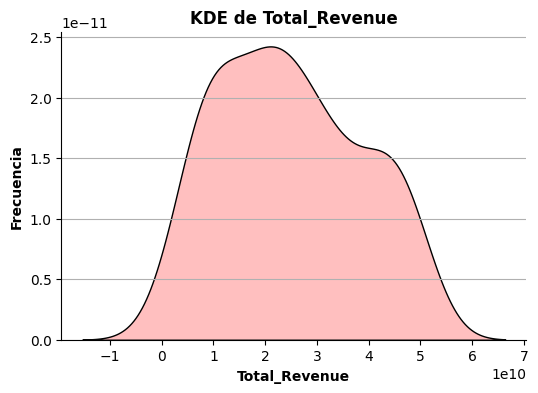

25148950992.513515
13618189022.346323


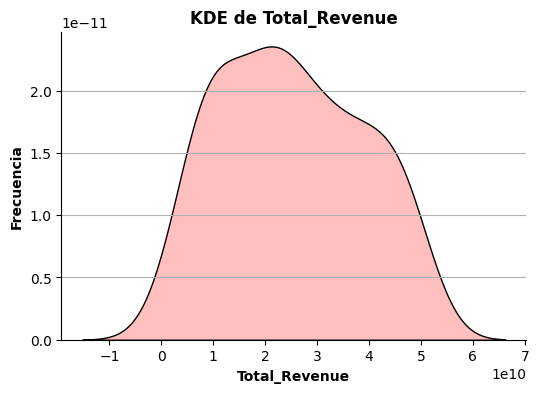

Short_Term_Debt
1052479944.4554235
596340643.0444168


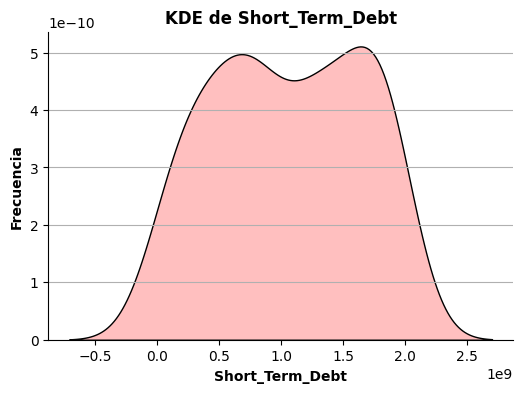

1060888151.0961004
589309815.2370651


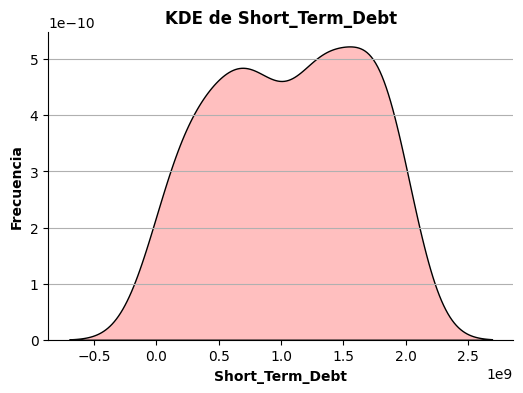

Financial_Expenses
251573569.2923278
159046229.53001612


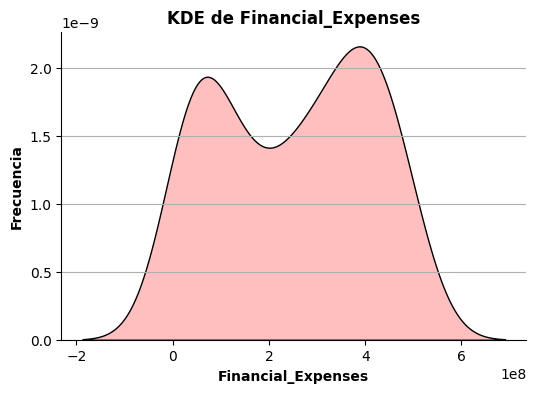

264278335.19418615
168039387.63500175


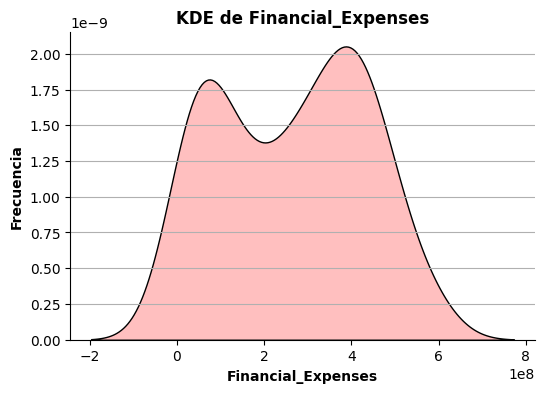

In [12]:
'''
Se itera para las variables numéricas para realizar el tratamiento,
la estrategia para llenar los valores vacíos consiste en generar valores aleatorios
distribuidos según la distribución normal,
con la media y y varianza de la variable en cuestión.
'''

for col in col_null:
  #si tiene más de un nulo que haga su gráfica KDE
  print(col)
  graf_kde(df, col)
  col_mean = df[col].mean()
  col_std  = df[col].std()
  df[col].fillna(np.random.normal(col_mean, col_std), inplace=True)   # "inputamos" con un v. aleatorio
  # imprimimos de nuevo la gráfica KDE para ver si los cambios en la dist. fueron significativos
  graf_kde(df, col)

In [13]:
# Se confirma que la "inputación" haya sido exitosa
df.isnull().mean()*100

,0
Company_ID,0.000000
Total_Revenue,0.000000
Short_Term_Debt,0.000000
Long_Term_Debt,0.000000
Current_Assets,0.000000
Current_Liabilities,0.000000
Equity,0.000000
Financial_Expenses,0.000000
Current_Ratio,0.000000
Debt_to_Equity_Ratio,0.000000


### Outliers

In [14]:
'''La identificarción de outliers se realizar{a con el rango intercuartílico
y gráficas de cajas, para lo que se genera una función'''

def ICR_limites(df, col):
  # Calcular los cuartiles
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1 # Rango intercuartílico
  # Definir los límites para identificar outliers
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return(lower_bound, upper_bound)

def boxplot_outliers(df, col):
  lower_bound, upper_bound = ICR_limites(df, col)
  df['flag_outlier'] = 0
  # Marcar las filas que sean outliers en la columna actual
  df['flag_outlier'] = df['flag_outlier'] | ((df[col] < lower_bound) | (df[col] > upper_bound)).astype(int)

  if df['flag_outlier'].sum() > 0:
    print(col)
    print(str(df['flag_outlier'].sum()) + ' outliers')
    print(str(df['flag_outlier'].mean()) + '%')

    plt.figure(figsize=(6, 4))
    boxplot = sns.boxplot(data=df[col], color='lightblue', fliersize=8)
    for flier in boxplot.artists:
        flier.set_edgecolor('red')
    plt.title(f'Boxplot {col}')
    plt.xlabel(col)
    plt.ylabel('Valores')
    plt.show()
    return(col)

Current_Ratio
9 outliers
0.0891089108910891%


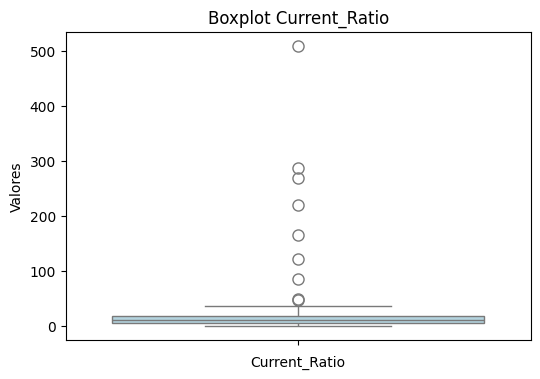

Debt_to_Equity_Ratio
16 outliers
0.15841584158415842%


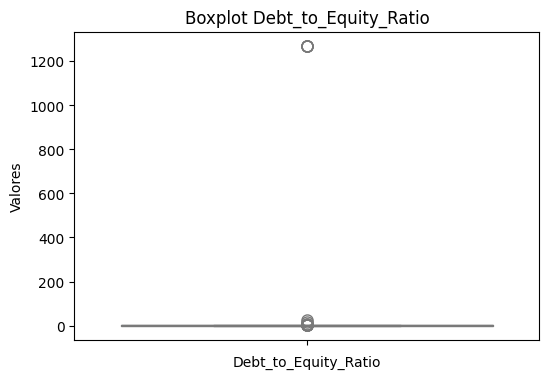

Interest_Coverage_Ratio
13 outliers
0.12871287128712872%


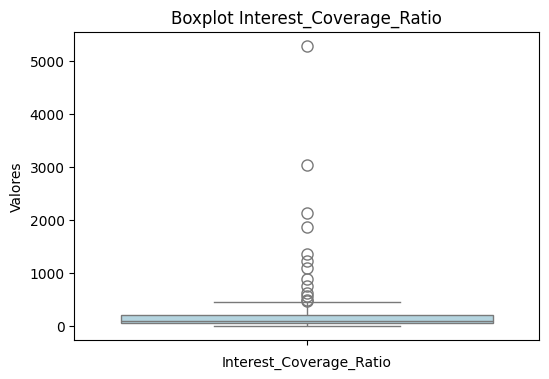

['Current_Ratio', 'Debt_to_Equity_Ratio', 'Interest_Coverage_Ratio']


In [15]:
### outliers
col_ol = []
#creamos un ciclo para todas las columnas numéricas
for col in cols_num:
  columna = boxplot_outliers(df, col)
  if columna != None:
    col_ol.append(columna)
print(col_ol)

In [16]:
# Como 'Debt_to_Equity_Ratio' tiene valores muy altos y se puede recalcular, se revisa que esté bien calculada
df['debt'] = df['Short_Term_Debt'] + df['Long_Term_Debt']
df['debt_to_equity_recalculado'] = df['debt'] / df['Equity']
df['dif_dte'] = abs(df['debt_to_equity_recalculado'] - df['Debt_to_Equity_Ratio'])
df[['Debt_to_Equity_Ratio', 'debt_to_equity_recalculado', 'dif_dte']].sort_values(by='dif_dte', ascending=False)

,Debt_to_Equity_Ratio,debt_to_equity_recalculado,dif_dte
6,"1,271.000000",0.212218,"1,270.787782"
72,"1,271.000000",0.302391,"1,270.697609"
65,"1,271.000000",0.306417,"1,270.693583"
3,"1,271.000000",0.395163,"1,270.604837"
91,"1,271.000000",0.556148,"1,270.443852"
...,...,...,...
39,2.000000,2.000212,0.000212
74,1.490000,1.490161,0.000161
2,0.360000,0.360079,0.000079
84,1.160000,1.160076,0.000076


In [17]:
# Se observa que para la columna Debt to Equity Ratio hay valores mal calculados por lo que se sustituye su valor con el cálculo manual
df.loc[df['dif_dte'] > 0.5, 'Debt_to_Equity_Ratio'] = df['debt_to_equity_recalculado']
df = df.drop(['debt', 'dif_dte', 'debt_to_equity_recalculado'], axis=1)

In [18]:
for col in col_ol:
  lower_bound, upper_bound = ICR_limites(df, col)
  # cambios los valores de los outliers por el máximo valor que entre en Rango itercuartílico
  df[col] = df[col].apply(lambda value: upper_bound if value > upper_bound else value)

In [19]:
# Se confirma que no se haya perdido información
df.shape

(101, 15)

In [20]:
df.describe()

,Total_Revenue,Short_Term_Debt,Long_Term_Debt,Current_Assets,Current_Liabilities,Equity,Financial_Expenses,Current_Ratio,Debt_to_Equity_Ratio,Interest_Coverage_Ratio,flag_outlier
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,"25,148,950,992.513515","1,060,888,151.096100","5,228,171,736.127770","10,194,114,668.303595","1,108,591,327.779467","15,408,961,444.848749","264,278,335.194186",13.201782,0.540667,159.092079,0.128713
std,"13,618,189,022.346323","589,309,815.237065","2,714,670,436.704122","5,946,769,013.335551","573,474,434.011681","8,388,013,481.273661","168,039,387.635002",11.225341,0.417091,148.863412,0.336552
min,"1,045,042,605.568554","4,918,550.677225","80,567,477.374441","77,557,462.321911","17,733,419.930084","206,904,173.851169","3,579,765.376712",0.040000,0.030000,7.230000,0.000000
25%,"13,503,611,134.506683","567,915,636.326525","2,758,102,883.693295","5,000,405,776.844303","758,132,928.219588","7,662,303,570.131100","101,434,250.099804",4.280000,0.240000,47.570000,0.000000
50%,"23,988,485,856.902466","1,101,869,811.662170","5,626,673,982.082401","9,869,102,437.472025","1,155,176,942.718130","15,782,664,247.881229","284,963,846.908682",10.280000,0.395163,101.250000,0.000000
75%,"37,305,155,704.230103","1,568,781,275.686539","7,465,399,110.253667","16,157,549,606.593836","1,586,932,233.566293","22,862,290,103.350239","402,182,224.267984",18.260000,0.690000,211.670000,0.000000
max,"49,987,129,153.219925","1,988,643,067.910527","9,901,867,173.894899","19,801,152,411.786903","1,987,047,270.532833","29,496,153,456.868839","572,368,908.314251",39.230000,1.365000,457.820000,1.000000


In [21]:
#Guardamos nuestra base de datos limpia
df.to_csv(carpeta + 'Datos_proyecto_clean.csv', index=False)